<a href="https://colab.research.google.com/github/shripad-96/ML-Roadmap-for-2022/blob/main/stacked_LSTM_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

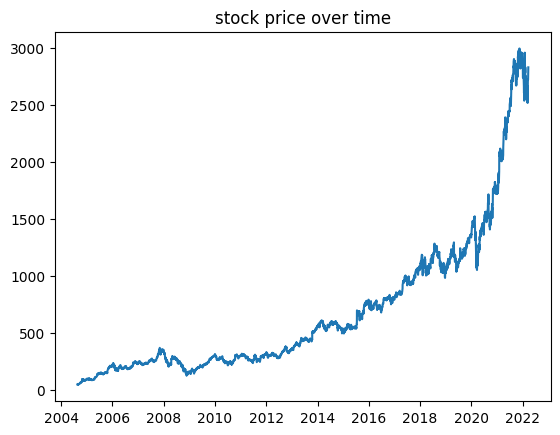

In [19]:
#load dataset
df = pd.read_csv('/content/GOOGL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

#visualize closing prices
plt.plot(df['Close'])
plt.title('stock price over time')
plt.show()

In [22]:
#normalize prices
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df[['Close']])

In [29]:
#create database with lag
def create_dataset(data, time_step = 60):
  X,y = [],[]
  for i in range(len(data)-time_step-1):
    X.append(data[i:(i+time_step), 0])
    y.append(data[i+time_step, 0])
  return np.array(X),np.array(y)

time_step = 60
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1],1)

In [30]:
#model architecture
model = Sequential([
LSTM(50, return_sequences = True, input_shape=(X.shape[1],1)),
LSTM(50, return_sequences = True),
LSTM(50),
Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
#Train-test split
train_size = int(len(X) *0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

#prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 7.6502e-05 - val_loss: 0.0024
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 5.8048e-05 - val_loss: 0.0021
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 6.3915e-05 - val_loss: 0.0032
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - loss: 5.8491e-05 - val_loss: 0.0025
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - loss: 5.5249e-05 - val_loss: 0.0017
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 5.5335e-05 - val_loss: 0.0032
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 6.8421e-05 - val_loss: 0.0033
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - loss: 5.6596e-05 - val_loss: 0.0023
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - loss: 5.0739e-05 - val_loss: 0.0018
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 5.2491e-05 - val_loss: 0.0025
Epoch

RMSE 1804.2780764474921


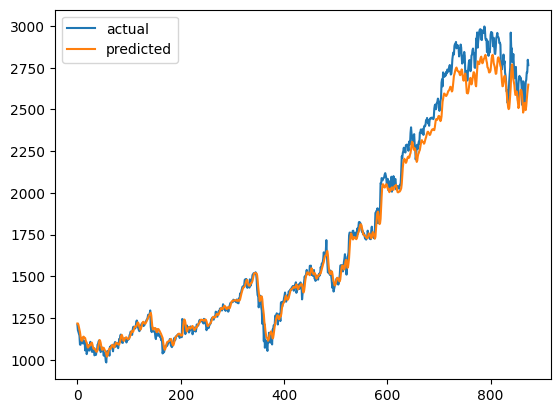

In [33]:
#Evaluate the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('RMSE',rmse)

#plot actual vs predicted
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label="actual")
plt.plot(predictions, label = 'predicted')
plt.legend()
plt.show()